# Traitement des données Date
#### Liste des remarques :
- certaines dates sont au format 'YYYY-MM-DD HH:MM:SS.000' et d'autres au format 'YYYY-MM-DD HH:MM:SS'
- comme on pouvait s'y attendre, la famille de produits la plus vendue dépend fortement de la période de la journée, par exemple :
  - le matin, les produits de la famille 'Viennnoiserie' sont les plus vendus
  - le midi, il n'y a pas vraiment de famille de produits qui se démarque mais on peut noter que les repas et les snacks sucrés arrivent en tête
  - l'après-midi, les snacks sucrés sont les plus vendus
  - le soir, sans surprise, c'est la bière qui est la plus vendue que ce soit en pression ou en bouteille
- aucune valeur manquante, très bien !
- les semestres de P21, A20 et l'intersemestre (toute année confondue) sont les moins représentés et c'est normal car ces deux semestres correspondent à la période de confinement
- certains point de vente ont des données hors des 5 jours de la semaine, ce qui est contraire à notre hypothèse de travail

#### Liste des corrections prévues :
##### Ajout :
- [ ] ajouter une colonne 'periode' qui contient la période de la journée (matin, midi, après-midi, soir)
- [ ] ajouter une colonne 'jour' qui contient le jour de la semaine (lundi, mardi, mercredi, jeudi, vendredi, samedi, dimanche)
- [ ] ajouter une colonne 'semestre' qui contient le semestre de l'année : AXX : Automne, PXX : Printemps où XX est l'année

##### Retrait :
- [ ] évaluer la pertinence de conserver les semestres de P21, A20 et l'intersemestre (toute année confondue) ou de les supprimer
- [ ] évaluer la pertinence de conserver les points de vente qui ont des données hors des 5 jours de la semaine ou de les supprimer
- [ ] évaluer la pertinence de conserver les données hors des 5 jours de la semaine ou de les supprimer

##### Modification :
- [ ] convertir les dates au format 'YYYY-MM-DD HH:MM:SS.000' en 'YYYY-MM-DD HH:MM:SS' à l'aide d'une regex

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# lecture du fichier (pour vérifier que cela fonctionne)
data_folder = os.path.join(os.getcwd(), '../data_original')
df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')

C:\Users\sacha\AppData\Local\Temp\ipykernel_8268\2417836581.py:3: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')


### Visualisation des données initiales

In [4]:
df.head()

,Date/heure transaction,ID acheteur,Nom point de vente,Article,Famille d'article,Prix unitaire TTC,Quantité,Total TTC,Activité
0,2017-05-02 09:28:04.913,15228,Pic journée,Formule Tit Dej,Viennoiserie,1.0,1.0,1.0,NaN
1,2017-05-02 09:32:57.699,11678,Pic journée,Thé lipton,Viennoiserie,0.1,1.0,0.1,NaN
2,2017-05-02 09:37:13.780,11150,Pic journée,Café,Café & Thé,0.4,1.0,0.4,NaN
3,2017-05-02 09:37:13.780,11150,Pic journée,Pain au chocolatine,Viennoiserie,0.8,1.0,0.8,NaN
4,2017-05-02 09:37:32.487,10442,Pic journée,Thé lipton,Viennoiserie,0.1,1.0,0.1,NaN


In [5]:
# On visualise les données
df['Date/heure transaction']

0          2017-05-02 09:28:04.913
1          2017-05-02 09:32:57.699
2          2017-05-02 09:37:13.780
3          2017-05-02 09:37:13.780
4          2017-05-02 09:37:32.487
                    ...           
1993975    2017-04-28 21:45:18.903
1993976    2017-04-28 21:57:25.075
1993977    2017-04-28 21:59:14.298
1993978    2017-04-28 22:46:37.755
1993979    2017-04-29 17:14:54.555
Name: Date/heure transaction, Length: 1993980, dtype: object

In [6]:
# On vérifie la présence de valeurs manquantes
df['Date/heure transaction'].isnull().sum()

0

### Modification des données
On applique la modification mentionnée ci-dessus pour convertir les dates au format 'YYYY-MM-DD HH:MM:SS.000' en 'YYYY-MM-DD HH:MM:SS' à l'aide d'une regex.
Puis on les convertit en datetime

In [7]:
# On enleve les millisecondes si elles existent 
df['Date/heure transaction'] = df['Date/heure transaction'].str.replace('\.\d+', '', regex=True)

In [8]:
# Convertir la colonne de dates en format datetime
df['Date/heure transaction'] = pd.to_datetime(df['Date/heure transaction'], format='%Y-%m-%d %H:%M:%S')

### Ajout des périodes de la journée puis visualisation des données

In [9]:
# Définir une fonction pour déterminer la période de la journée
def determine_periode(date):
    heure = date.hour
    if 5 <= heure < 12:
        return 'matinee'
    elif 12 <= heure < 15:
        return 'midi'
    elif 15 <= heure < 19:
        return 'apresmidi'
    else:
        return 'soir'

# Appliquer la fonction à la colonne de dates et créer une nouvelle colonne 'periode'
df['Periode'] = df['Date/heure transaction'].apply(determine_periode)

<Axes: ylabel='count'>

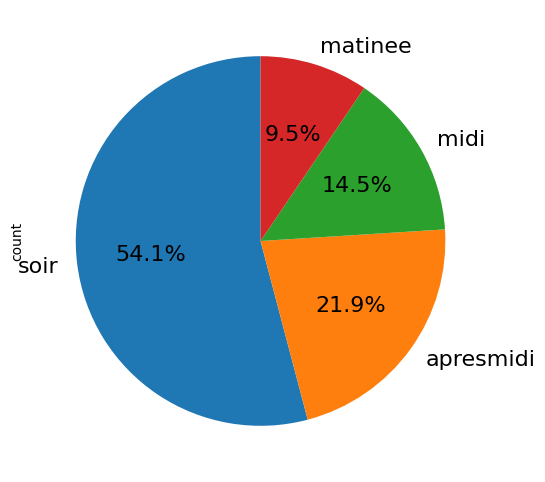

In [11]:
# On en fait un diagramme circulaire
df['Periode'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, fontsize=16) 

<Axes: xlabel='Periode'>

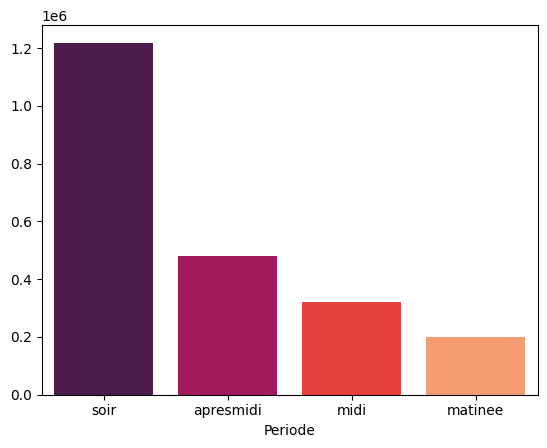

In [15]:
# On affiche la quantité de produits vendus par jour de la semaine
res = df.groupby(['Periode'])['Quantité'].sum()

res = res.sort_values(ascending=False)

# On affiche le résultat sous forme d'histogramme seaborn
sns.barplot(x=res.index, y=res.values, palette="rocket", order=res.index, saturation=1, capsize=0.5)

### Ajout de la colonne 'jour de la semaine'

In [16]:
jours_semaine = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
df['Jour semaine'] = df['Date/heure transaction'].apply(lambda x: jours_semaine[x.weekday()])

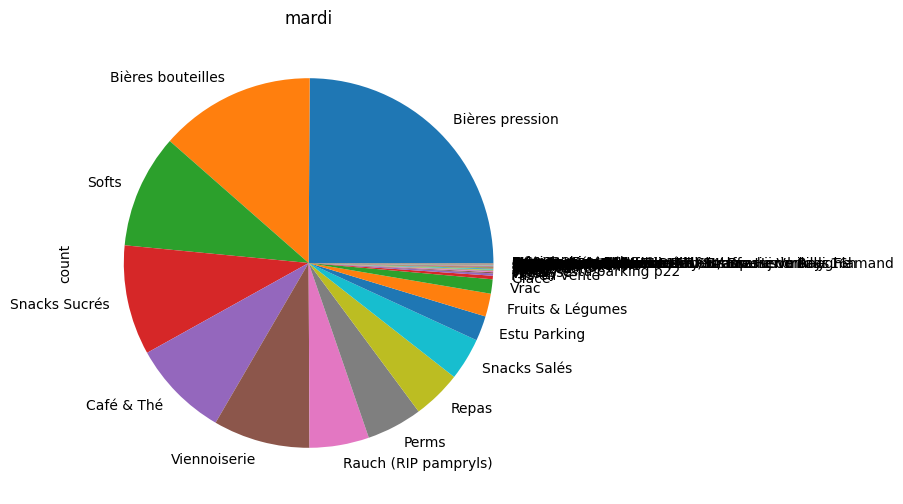

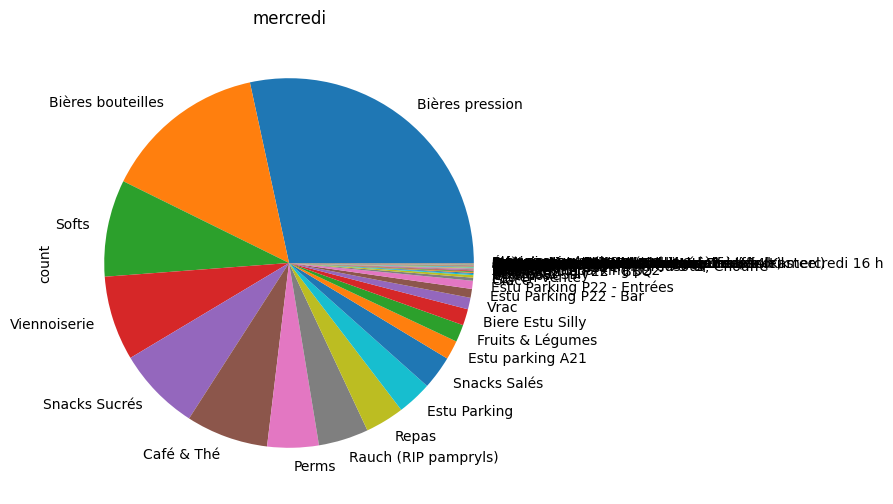

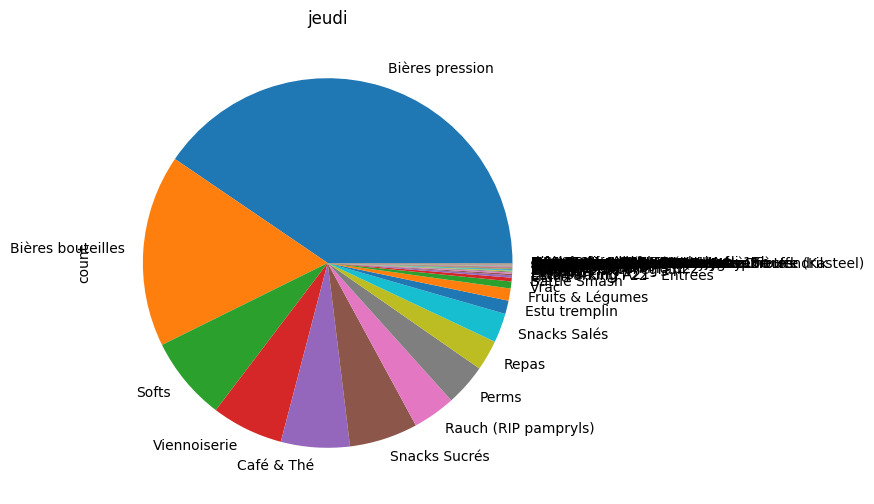

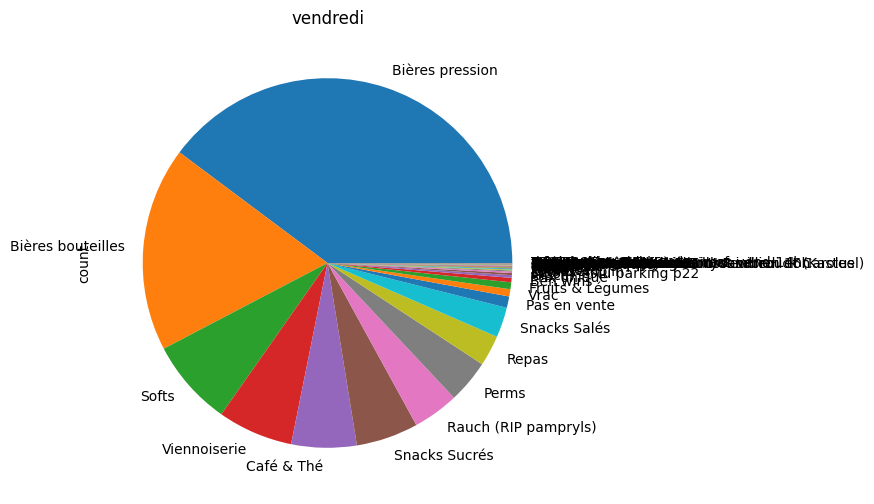

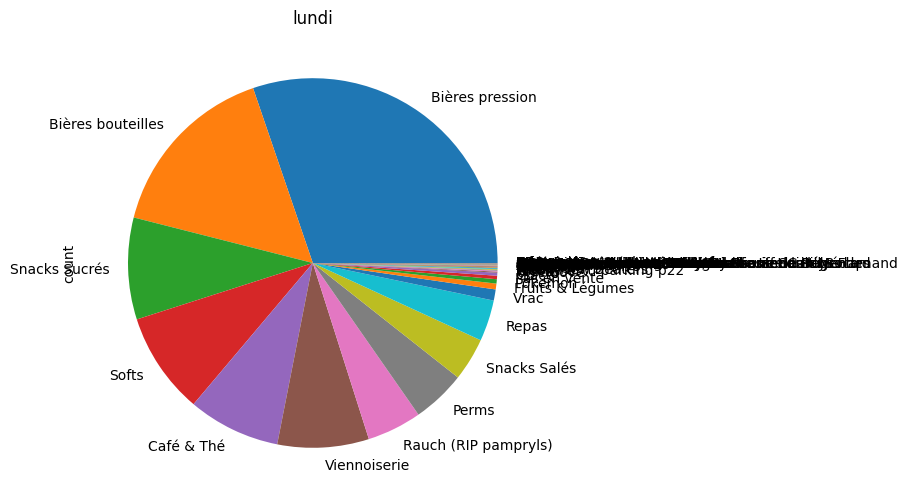

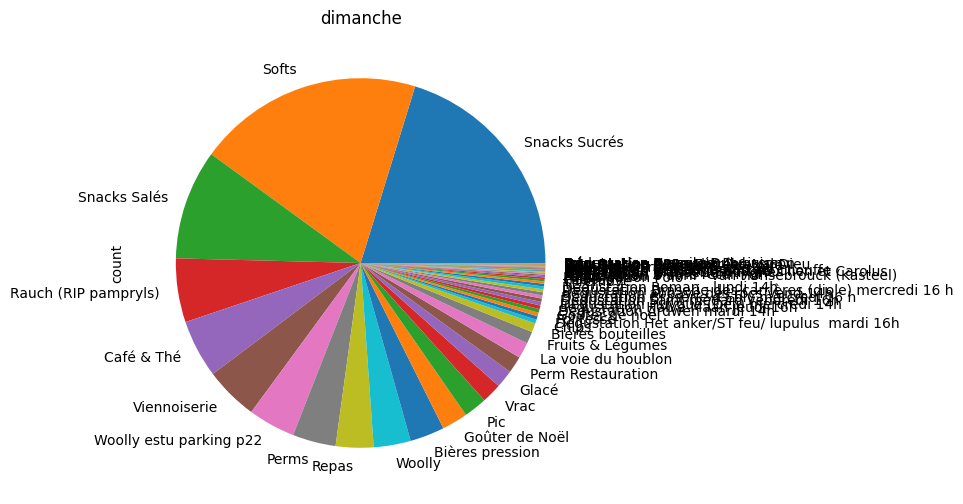

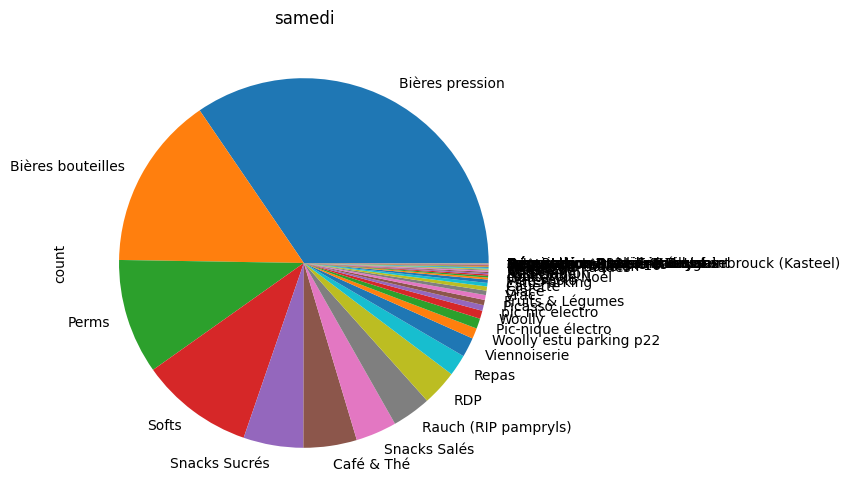

In [19]:
# On regarde le nombre de transactions par jour de la semaine et par famille d'article en les représentant dans un diagramme circulaire
for jour in df['Jour semaine'].unique():
    # On ajoute uniquement si le nombre de transactions est supérieur à 200
    df[df['Jour semaine'] == jour]['Famille d\'article'].value_counts().plot(kind='pie', figsize=(6, 6))
    plt.title(jour)
    plt.show()

<Axes: xlabel='Jour semaine'>

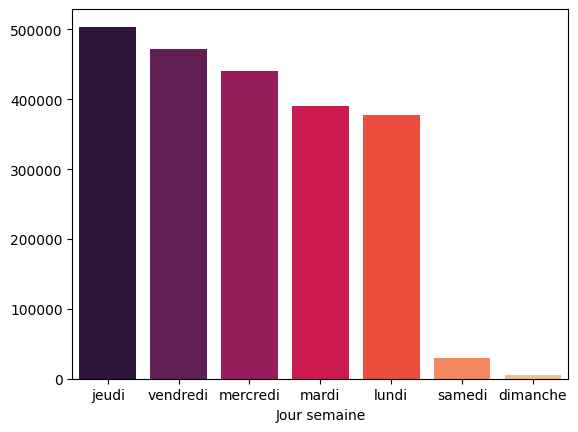

In [21]:
# On affiche la quantité de produits vendus par jour de la semaine
res = df.groupby(['Jour semaine'])['Quantité'].sum()

res = res.sort_values(ascending=False)

# On affiche le résultat sous forme d'histogramme seaborn
sns.barplot(x=res.index, y=res.values, palette="rocket", order=res.index, saturation=1, capsize=0.5)

### Ajout de la colonne 'semestre'

In [22]:
# On se base sur le fonctionnement suivant, basé sur le semestre académique de l'UTC de 2022
# - semestre automne : 1er septembre au 20 janvier
# - intersemestre : 21 janvier au 20 février et 1er juillet au 31 août
# - semestre printemps : 21 février au 30 juin

def determine_semestre(date):
    jour = date.day
    mois = date.month
    annee = date.year
    
    if mois == 1 and jour <= 20:
        return 'A' + str(annee - 1)[2:]
    elif (mois == 1 and jour > 20) or (mois == 2 and jour <= 20):
        return 'IS'
    elif (mois == 2 and jour > 20) or (mois == 3) or (mois == 4) or (mois == 5) or (mois == 6):
        return 'P' + str(annee)[2:]
    elif mois == 7 or mois == 8:
        return 'IS'
    elif mois == 9 or mois == 10 or mois == 11 or mois == 12:
        return 'A' + str(annee)[2:]


# Appliquer la fonction à la colonne de dates et créer une nouvelle colonne 'semestre'
df['Semestre'] = df['Date/heure transaction'].apply(determine_semestre)

In [23]:
df.head()

,Date/heure transaction,ID acheteur,Nom point de vente,Article,Famille d'article,Prix unitaire TTC,Quantité,Total TTC,Activité,Periode,Jour semaine,Semestre
0,2017-05-02 09:28:04,15228,Pic journée,Formule Tit Dej,Viennoiserie,1.0,1.0,1.0,NaN,matinee,mardi,P17
1,2017-05-02 09:32:57,11678,Pic journée,Thé lipton,Viennoiserie,0.1,1.0,0.1,NaN,matinee,mardi,P17
2,2017-05-02 09:37:13,11150,Pic journée,Café,Café & Thé,0.4,1.0,0.4,NaN,matinee,mardi,P17
3,2017-05-02 09:37:13,11150,Pic journée,Pain au chocolatine,Viennoiserie,0.8,1.0,0.8,NaN,matinee,mardi,P17
4,2017-05-02 09:37:32,10442,Pic journée,Thé lipton,Viennoiserie,0.1,1.0,0.1,NaN,matinee,mardi,P17


<Axes: xlabel='Semestre'>

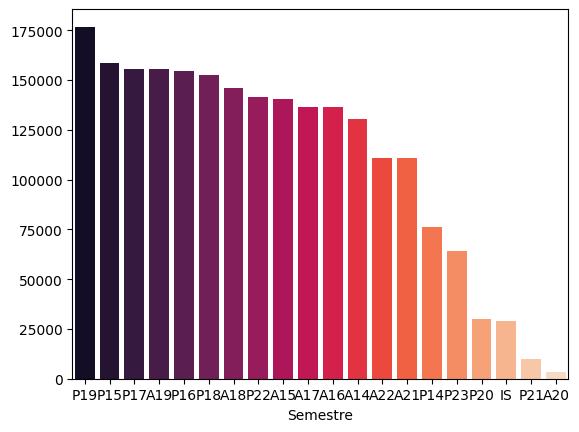

In [26]:
# On affiche la quantité de produits vendus par jour de la semaine
res = df.groupby(['Semestre'])['Quantité'].sum()

res = res.sort_values(ascending=False)

# On affiche le résultat sous forme d'histogramme seaborn
sns.barplot(x=res.index, y=res.values, palette="rocket", order=res.index, saturation=1, capsize=0.5)

<Axes: xlabel='Date/heure transaction'>

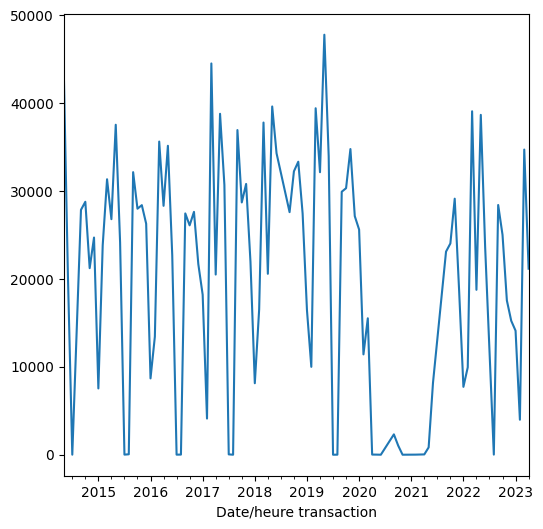

In [31]:
# On trace une courbe du nombre de transactions par mois

df['Date/heure transaction'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(6, 6))

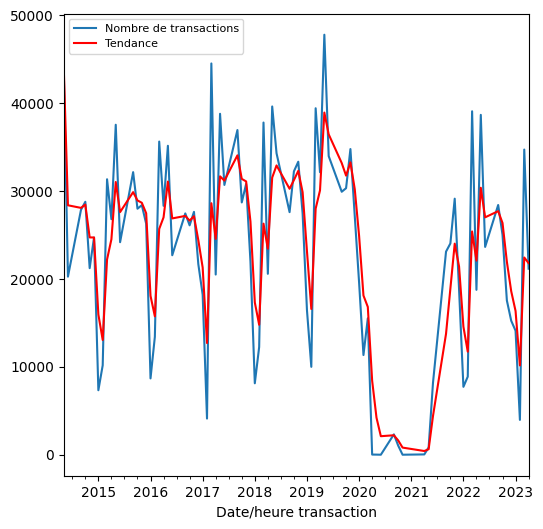

In [42]:
# On créé une copie ne contenant pas les transactions de l'intersemestre
df2 = df[df['Semestre'] != 'IS'].copy()

# On trace une courbe du nombre de transactions par mois
df2['Date/heure transaction'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(6, 6))
# On ajoute la tendance avec ewm
df2['Date/heure transaction'].dt.to_period('M').value_counts().sort_index().ewm(span=3).mean().plot(kind='line', figsize=(6, 6), color='red')

# On ajoute la légende en haut à gauche
plt.legend(['Nombre de transactions', 'Tendance'], loc='upper left', fontsize=8)

Les consommations lors des périodes d'examen sont très faibles, ce qui est normal car les étudiants sont des personnes sensées et responsables qui ne consomment pas d'alcool lors des périodes d'examen.

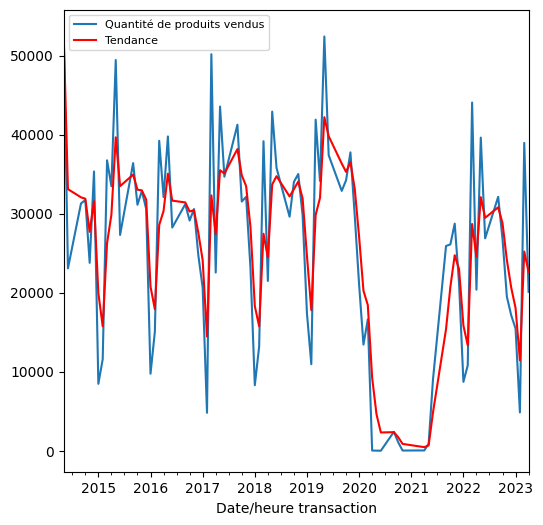

In [43]:
# On effectue la même chose mais en affichant la quantité de produits vendus par mois
df2.groupby(df2['Date/heure transaction'].dt.to_period('M'))['Quantité'].sum().sort_index().plot(kind='line', figsize=(6, 6))
df2.groupby(df2['Date/heure transaction'].dt.to_period('M'))['Quantité'].sum().sort_index().ewm(span=3).mean().plot(kind='line', figsize=(6, 6), color='red')
plt.legend(['Quantité de produits vendus', 'Tendance'], loc='upper left', fontsize=8)


### Ajout d'une variable booléenne pour savoir si un semestre est d'automne ou de printemps

#### Idée 1 : on répartit entre le printemps et l'automne en fonction du mois 

In [ ]:
# On se base sur le fonctionnement suivant, basé sur le semestre académique de l'UTC de 2022
# - A : 1er septembre au 20 janvier [Automne]
# - ISA : 21 janvier au 20 février [Intersemestre Automne]
# - P : 21 février au 30 juin [Printemps]
# - ISP : 1er juillet au 31 août [Intersemestre Printemps]

def det_sem_a_p (date):
    jour = date.day
    mois = date.month
    
    if mois == 1 and jour <= 20:
        return 'A'
    elif (mois == 1 and jour > 20) or (mois == 2 and jour <= 20):
        return 'ISA'
    elif (mois == 2 and jour > 20) or (mois == 3) or (mois == 4) or (mois == 5) or (mois == 6):
        return 'P'
    elif mois == 7 or mois == 8:
        return 'ISP'
    elif mois == 9 or mois == 10 or mois == 11 or mois == 12:
        return 'A'


# Appliquer la fonction à la colonne de dates et créer une nouvelle colonne 'semestre'
df['Automne Printemps'] = df['Date/heure transaction'].apply(det_sem_a_p)

In [ ]:
# On observe le nombre de transactions par automne printemps
df['Automne Printemps'].value_counts()

Automne Printemps
P      1001759
A       966639
ISA      25421
ISP        161
Name: count, dtype: int64